# What is probability? A simulated introduction

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Learning Objectives of Part 1

- To have an understanding of what "probability" means, in both Bayesian and Frequentist terms;
- To be able to simulate probability distributions that model real-world phenomena;
- To understand how probability distributions relate to data-generating **stories**.

## Probability

> To the pioneers such as Bernoulli, Bayes and Laplace, a probability represented a _degree-of-belief_ or plausibility; how much they thought that something was true, based on the evidence at hand. To the 19th century scholars, however, this seemed too vague and subjective an idea to be the basis of a rigorous mathematical theory. So they redefined probability as the _long-run relative frequency_ with which an event occurred, given (infinitely) many repeated (experimental) trials. Since frequencies can be measured, probability was now seen as an objective tool for dealing with _random_ phenomena.

-- _Data Analysis, A Bayesian Tutorial_, **Sivia & Skilling** (p. 9)

What type of random phenomena are we talking about here? One example is:

- Knowing that a website has a click-through rate (CTR) of 10%, we can calculate the probabilty of having 10 people, 9 people, 8 people ... and so on click through, upon drawing 10 people randomly from the population;
- But given the data of how many people click through, how can we calculate the CTR? And how certain can we be of this CTR? Or how likely is a particular CTR?

Science mostly asks questions of the second form above & Bayesian thinking provides a wondereful framework for answering such questions. Essentially Bayes' Theorem gives us a way of moving from the probability of the data given the model (written as $P(data|model)$) to the probability of the model given the data ($P(model|data)$).

We'll first explore questions of the 1st type using simulation: knowing the model, what is the probability of seeing certain data?

## Simulating probabilities

* Let's say that a website has a CTR of 50%, i.e. that 50% of people click through. If we picked 1000 people at random from thepopulation, how likely would it be to find that a certain number of people click?

We can simulate this using `numpy`'s random number generator.

To do so, first note we can use `np.random.rand()` to randomly select floats between 0 and 1 (known as the _uniform distribution_). Below, we do so and plot a histogram:

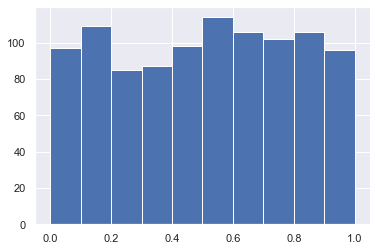

In [3]:
# Draw 1,000 samples from uniform & plot results
x = np.random.rand(1000)
plt.hist(x);

To then simulate the sampling from the population, we check whether each float was greater or less than 0.5. If less than or equal to 0.5, we say the person clicked.

In [4]:
# Computed how many people click
clicks = x <= 0.5
n_clicks = sum(clicks)
f"Number of clicks = {n_clicks}"

'Number of clicks = 476'

The proportion of people who clicked can be calculated as the total number of clicks over the number of people:

In [5]:
# Computed proportion of people who clicked
f"Proportion who clicked = {n_clicks / 1000}"

'Proportion who clicked = 0.476'

**Discussion**: Did you get the same answer as your neighbour? If you did, why? If not, why not?

**Up for discussion:** Let's say that all you had was this data and you wanted to figure out the CTR (probability of clicking). 

* What would your estimate be?
* Bonus points: how confident would you be of your estimate?

**Note:** Although, in the above, we have described _probability_ in two ways, we have not described it mathematically. We're not going to do so rigorously here, but we will say that _probabilty_ defines a function from the space of possibilities (in the above, the interval $[0,1]$) that describes how likely it is to get a particular point or region in that space. Mike Betancourt has an elegant [Introduction to Probability Theory (For Scientists and Engineers)](https://betanalpha.github.io/assets/case_studies/probability_theory.html) that I can recommend.

### Hands-on: clicking

Use random sampling to simulate how many people click when the CTR is 0.7. How many click? What proportion?

In [11]:
# Solution
clicks = sum(np.random.rand(1000) <= 0.7)
n_clicks = clicks
print(f"Number of clicks = {n_clicks}")
print(f"Proportion who clicked = {n_clicks / 1000}")

Number of clicks = 694
Proportion who clicked = 0.694


_Discussion point_: This model is know as the bias coin flip. 
- Can you see why?
- Can it be used to model other phenomena?

### Galapagos finch beaks

You can also calculate such proportions with real-world data. Here we import a dataset of Finch beak measurements from the Galápagos islands. You can find the data [here](https://datadryad.org/resource/doi:10.5061/dryad.9gh90).

In [12]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [13]:
# Store lengths in a pandas series
lengths = df_12['blength']

* What proportion of birds have a beak length > 10 ?

In [14]:
p = sum(lengths > 10) / len(lengths)
p

0.8514056224899599

**Note:** This is the proportion of birds that have beak length $>10$ in your empirical data, not the probability that any bird drawn from the population will have beak length $>10$.

### Proportion: A proxy for probability

As stated above, we have calculated a proportion, not a probability. As a proxy for the probability, we can simulate drawing random samples (with replacement) from the data seeing how many lengths are > 10 and calculating the proportion (commonly referred to as [hacker statistics](https://speakerdeck.com/jakevdp/statistics-for-hackers)):

In [17]:
n_samples = 10000
sum(np.random.choice(lengths, n_samples, replace=True) > 10) / n_samples

0.8486

### Another way to simulate coin-flips

In the above, you have used the uniform distribution to sample from a series of biased coin flips. I want to introduce you to another distribution that you can also use to do so: the **binomial distribution**.

The **binomial distribution** with parameters $n$ and $p$ is defined as the probability distribution of

> the number of heads seen when flipping a coin $n$ times when  with $p(heads)=p$.

**Note** that this distribution essentially tells the **story** of a general model in the following sense: if we believe that they underlying process generating the observed data has a binary outcome (affected by disease or not, head or not, 0 or 1, clicked through or not), and that one the of the two outcomes occurs with probability $p$, then the probability of seeing a particular outcome is given by the **binomial distribution** with parameters $n$ and $p$.

Any process that matches the coin flip story is a Binomial process (note that you'll see such coin flips also referred to as Bernoulli trials in the literature).  So we can also formulate the story of the Binomial distribution as

> the number $r$ of successes in $n$ Bernoulli trials with probability $p$ of success, is Binomially distributed. 

We'll now use the binomial distribution to answer the same question as above:
* If P(heads) = 0.7 and you flip the coin ten times, how many heads will come up?

We'll also set the seed to ensure reproducible results.

In [20]:
# Set seed
np.random.seed(42)

In [44]:
# Simulate one run of flipping the biased coin 10 times
np.random.binomial(1, 0.7)

8

### Simulating many times to get the distribution

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get $n$ heads, for example, we need to simulate it a lot of times and check what proportion ended up with $n$ heads.

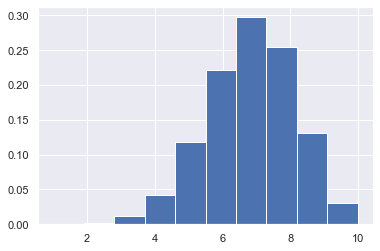

In [46]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(10, 0.7, 10000)

# Plot normalized histogram of results
plt.hist(x, density=True, bins=10);

* Group chat: what do you see in the above?

### Hands-on: Probabilities

- If I flip a biased coin ($P(H)=0.3$) 20 times, what is the probability of 5 or more heads?

In [52]:
# Calculate the probability of 5 or more heads for p=0.3
x = np.random.binomial(20, 0.3, 10000)
sum(x >= 5) / x.shape[0]

0.7661

- If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [53]:
# Calculate the probability of 5 or more heads for p=0.5
x = np.random.binomial(20, 0.5, 10000)
sum(x >= 5) / x.shape[0]

0.9939

- Plot the normalized histogram of number of heads of the following experiment: flipping a fair coin 10 times.

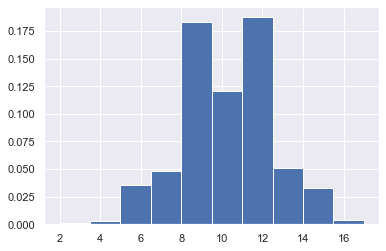

In [55]:
# Plot histogram 
x = np.random.binomial(20, 0.5, 10_000)
plt.hist(x, density=True, bins=10);

**Note:** you may have noticed that the _binomial distribution_ can take on only  a finite number of values, whereas the _uniform distribution_ above can take on any number between $0$ and $1$. These are different enough cases to warrant special mention of this & two different names: the former is called a _probability mass function_ (PMF) and the latter a _probability distribution function_ (PDF). Time permitting, we may discuss some of the subtleties here. If not, all good texts will cover this. I like (Sivia & Skilling, 2006), among many others.


**Question:** 
* Looking at the histogram, can you tell me the probability of seeing 4 or more heads?

Enter the ECDF.

## Empirical cumulative distribution functions (ECDFs)

An ECDF is, as an alternative to a histogram, a way to visualize univariate data that is rich in information. It allows you to visualize all of your data and, by doing so, avoids the very real problem of binning.
- can plot control plus experiment
- data plus model!
- many populations
- can see multimodality (though less pronounced) -- a mode becomes a point of inflexion!
- can read off so much: e.g. percentiles.

See Eric Ma's great post on ECDFS [here](https://ericmjl.github.io/blog/2018/7/14/ecdfs/) AND [this twitter thread](https://twitter.com/allendowney/status/1019171696572583936) (thanks, Allen Downey!).

So what is  this ECDF? 

**Definition:** In an ECDF, the x-axis is the range of possible values for the data & for any given x-value, the corresponding y-value is the proportion of data points less than or equal to that x-value.

Let's define a handy ECDF function that takes in data and outputs $x$ and $y$ data for the ECDF.

In [56]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

### Hands-on: Plotting ECDFs

Plot the ECDF for the previous hands-on  exercise. Read the answer to the following question off the ECDF: he probability of seeing 4 or more heads?

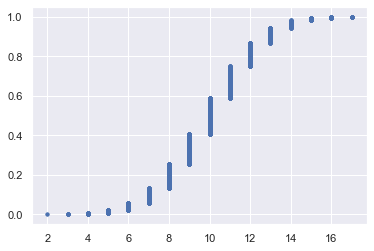

In [58]:
# Generate x- and y-data for the ECDF
x_flips, y_flips = ecdf(x)

# Plot the ECDF
plt.plot(x_flips, y_flips, marker='.', linestyle='none');

## Probability distributions and their stories

**Credit:** Thank you to [Justin Bois](http://bois.caltech.edu/) for countless hours of discussion, work and collaboration on thinking about probability distributions and their stories. All of the following is inspired by Justin & his work, if not explicitly drawn from.

___

In the above, we saw that we could match data-generating processes with binary outcomes to the story of the binomial distribution.

> The Binomial distribution's story is as follows: the number $r$ of successes in $n$ Bernoulli trials with probability $p$ of success, is Binomially distributed. 

There are many other distributions with stories also!

### Poisson processes and the Poisson distribution

In the book [Information Theory, Inference and Learning Algorithms](https://www.amazon.com/Information-Theory-Inference-Learning-Algorithms/dp/0521642981) David MacKay tells the tale of a town called Poissonville, in which the buses have an odd schedule. Standing at a bus stop in Poissonville, the amount of time you have to wait for a bus is totally independent of when the previous bus arrived. This means you could watch a bus drive off and another arrive almost instantaneously, or you could be waiting for hours.

Arrival of buses in Poissonville is what we call a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way. 

* natural births in a given hospital (there is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one);
* Landings on a website;
* Meteor strikes;
* Molecular collisions in a gas;
* Aviation incidents.

Any process that matches the buses in Poissonville **story** is a Poisson process.

    

The number of arrivals of a Poisson process in a given amount of time is Poisson distributed. The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.

In [ ]:
# Generative Models : generate things that look like data
# eg. simulating data from distribution

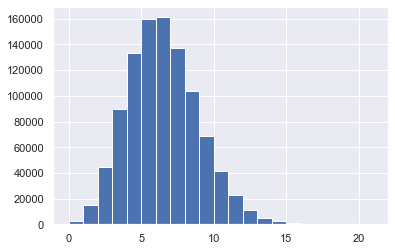

In [59]:
# Generate Poisson-distributed data
samples  =  np.random.poisson(6, size=10**6)

# Plot histogram
plt.hist(samples, bins=21);

**Question:** Does this look like anything to you?

In fact, the Poisson distribution is the limit of the Binomial distribution for low probability of success and large number of trials, that is, for rare events. 

To see this, think about the stories. Picture this: you're doing a Bernoulli trial once a  minute for an hour, each with a success probability of 0.05. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 3 successes. This is just like the Poisson story of seeing 3 buses on average arrive in a given interval of time. Thus the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). This is useful because the Poisson distribution can be simpler to work with as it has only one parameter instead of two for the Binomial distribution.

#### Hands-on: Poisson

Plot the ECDF of the Poisson-distributed data that you generated above.

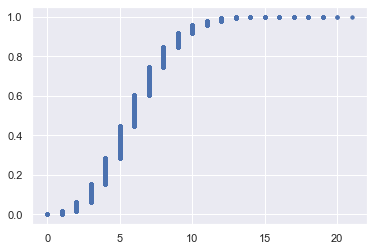

In [60]:
# Generate x- and y-data for the ECDF
x_p, y_p = ecdf(samples)

# Plot the ECDF
plt.plot(x_p, y_p, marker='.', linestyle='none');

#### Example Poisson distribution: field goals attempted per game

This section is explicitly taken from the great work of Justin Bois. You can find more [here](https://github.com/justinbois/dataframed-plot-examples/blob/master/lebron_field_goals.ipynb).

Let's first remind ourselves of the story behind the Poisson distribution.
> The number of arrivals of a Poisson processes in a given set time interval is Poisson distributed.

To quote Justin Bois:

> We could model field goal attempts in a basketball game using a Poisson distribution. When a player takes a shot is a largely stochastic process, being influenced by the myriad ebbs and flows of a basketball game. Some players shoot more than others, though, so there is a well-defined rate of shooting. Let's consider LeBron James's field goal attempts for the 2017-2018 NBA season.

First thing's first, the data ([from here](https://www.basketball-reference.com/players/j/jamesle01/gamelog/2018)):

In [61]:
fga = [19, 16, 15, 20, 20, 11, 15, 22, 34, 17, 20, 24, 14, 14, 
       24, 26, 14, 17, 20, 23, 16, 11, 22, 15, 18, 22, 23, 13, 
       18, 15, 23, 22, 23, 18, 17, 22, 17, 15, 23, 8, 16, 25, 
       18, 16, 17, 23, 17, 15, 20, 21, 10, 17, 22, 20, 20, 23, 
       17, 18, 16, 25, 25, 24, 19, 17, 25, 20, 20, 14, 25, 26, 
       29, 19, 16, 19, 18, 26, 24, 21, 14, 20, 29, 16, 9]

To show that this LeBron's attempts are ~ Poisson distributed, you're now going to plot the ECDF and compare it with the the ECDF of the Poisson distribution that has the mean of the data (technically, this is the maximum likelihood estimate).

#### Hands-on: Simulating Data Generating Stories

Generate the x and y values for the ECDF of LeBron's field attempt goals.

In [62]:
# Generate x & y data for ECDF
x_ecdf, y_ecdf = ecdf(fga)

Now we'll draw samples out of a Poisson distribution to get the theoretical ECDF, plot it with the ECDF of the data and see how they look.

Text(0, 0.5, 'ECDF')

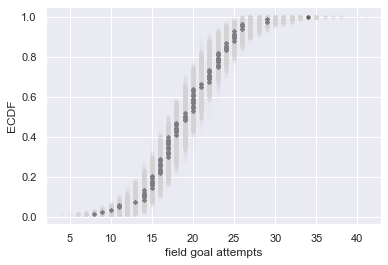

In [63]:
# Number of times we simulate the model
n_reps = 1000

# Plot ECDF of data
plt.plot(x_ecdf, y_ecdf, '.', color='black');

# Plot ECDF of model
for _ in range(n_reps):
    samples = np.random.poisson(np.mean(fga), size=len(fga))
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor, '.', alpha=0.01, color='lightgray');


# Label your axes
plt.xlabel('field goal attempts')
plt.ylabel('ECDF')

You can see from the ECDF that LeBron's field goal attempts per game are Poisson distributed.

### Exponential distribution

We've encountered a variety of named _discrete distributions_. There are also named _continuous distributions_, such as the Exponential distribution and the Normal (or Gaussian) distribution. To see what the story of the Exponential distribution is, let's return to Poissonville, in which the number of buses that will arrive per hour are Poisson distributed.
However, the waiting time between arrivals of a Poisson process are exponentially distributed.

So: the exponential distribution has the following story: the waiting time between arrivals of a Poisson process are exponentially distributed. It has a single parameter, the mean waiting time. This distribution is not peaked, as we can see from its PDF.

For an illustrative example, lets check out the time between all incidents involving nuclear power since 1974. It's a reasonable first approximation to expect incidents to be well-modeled by a Poisson process, which means the timing of one incident is independent of all others. If this is the case, the time between incidents should be Exponentially distributed.


To see if this story is credible, we can plot the ECDF of the data with the CDF that we'd get from an exponential distribution with the sole parameter, the mean, given by the mean inter-incident time of the data.


In [ ]:
# Load nuclear power accidents data & create array of inter-incident times
df = pd.read_csv('../data/nuclear_power_accidents.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df.Date >= pd.to_datetime('1974-01-01')]
inter_times = np.diff(np.sort(df.Date)).astype(float) / 1e9 / 3600 / 24

In [ ]:
# Compute mean and sample from exponential
mean = ___
samples = ___

# Compute ECDFs for sample & model
x, y = ___
x_theor, y_theor = ___

In [ ]:
# Plot sample & model ECDFs
___;
plt.plot(x, y, marker='.', linestyle='none');

We see that the data is close to being Exponentially distributed, which means that we can model the nuclear incidents as a Poisson process.

### Normal distribution

The Normal distribution, also known as the Gaussian or Bell Curve, appears everywhere. There are many reasons for this. One is the following:

> When doing repeated measurements, we expect them to be Normally distributed, owing to the many subprocesses that contribute to a measurement. This is because (a formulation of the Central Limit Theorem) **any quantity that emerges as the sum of a large number of subprocesses tends to be Normally distributed** provided none of the subprocesses is very broadly distributed.

Now it's time to see if this holds for the measurements of the speed of light in the famous Michelson–Morley experiment:

Below, I'll plot the histogram with a Gaussian curve fitted to it. Even if that looks good, though, that could be due to binning bias. SO then you'll plot the ECDF of the data and the CDF of the model!

Text(0, 0.5, 'PDF')

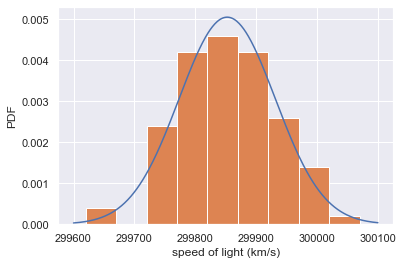

In [64]:
# Load data, plot histogram 
import scipy.stats as st
df = pd.read_csv('../data/michelson_speed_of_light.csv')
df = df.rename(columns={'velocity of light in air (km/s)': 'c'})
c = df.c.values
x_s = np.linspace(299.6, 300.1, 400) * 1000
plt.plot(x_s, st.norm.pdf(x_s, c.mean(), c.std(ddof=1)))
plt.hist(c, bins=9, density=True)
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')

#### Hands-on: Simulating Normal

Text(0, 0.5, 'CDF')

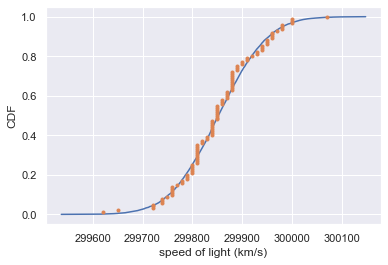

In [65]:
# Get speed of light measurement + mean & standard deviation
michelson_speed_of_light = df.c.values
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light, ddof=1)

# Generate normal samples w/ mean,  std of data
samples = np.random.normal(mean, std, size=10000)

# Generate data ECDF & model CDF
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

# Plot data & model (E)CDFs
_ = plt.plot(x_theor, y_theor);
_ = plt.plot(x, y, marker='.', linestyle='none');
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')

Some of you may ask but is the data really normal? I urge you to check out Allen Downey's post [_Are your data normal? Hint: no._ ](http://allendowney.blogspot.com/2013/08/are-my-data-normal.html)